<a href="https://colab.research.google.com/github/akhilps45/Machine_Learning_Models/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [97]:
data = pd.read_csv('/content/metro.csv')
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [98]:
data.shape

(48204, 9)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data.size

433836

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [106]:
data.isna().sum()

,0
holiday,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [105]:
data['holiday'] = data['holiday'].fillna(data['holiday'].mode()[0])
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,Labor Day,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,Labor Day,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,Labor Day,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,Labor Day,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,Labor Day,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [110]:
data.duplicated().sum()

np.int64(0)

In [109]:
data.drop_duplicates(inplace=True)

In [113]:
num_df = data.select_dtypes(include = 'number')
cat_df = data.select_dtypes(include = 'object')
print("Numerical data:\n" ,num_df )
print("Categorical data: \n",cat_df)

Numerical data:
          temp  rain_1h  snow_1h  clouds_all  traffic_volume
0      288.28      0.0      0.0          40            5545
1      289.36      0.0      0.0          75            4516
2      289.58      0.0      0.0          90            4767
3      290.13      0.0      0.0          90            5026
4      291.14      0.0      0.0          75            4918
...       ...      ...      ...         ...             ...
48199  283.45      0.0      0.0          75            3543
48200  282.76      0.0      0.0          90            2781
48201  282.73      0.0      0.0          90            2159
48202  282.09      0.0      0.0          90            1450
48203  282.12      0.0      0.0          90             954

[48187 rows x 5 columns]
Categorical data: 
          holiday  weather_main     weather_description            date_time
0      Labor Day        Clouds        scattered clouds  2012-10-02 09:00:00
1      Labor Day        Clouds           broken clouds  2012-10-0

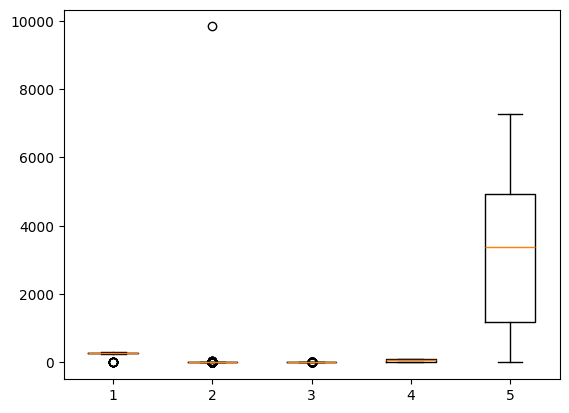

In [114]:
plt.boxplot(num_df)
plt.show()

In [115]:
def replace_outliers(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3 - q1
  upper_bound=q3 + 1.5 * iqr
  lower_bound=q1 - 1.5 * iqr
  df[column_name]=df[column_name].clip(upper=upper_bound)
  df[column_name]=df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [123]:
for col in num_df:
    data[col] = replace_outliers(data, col)

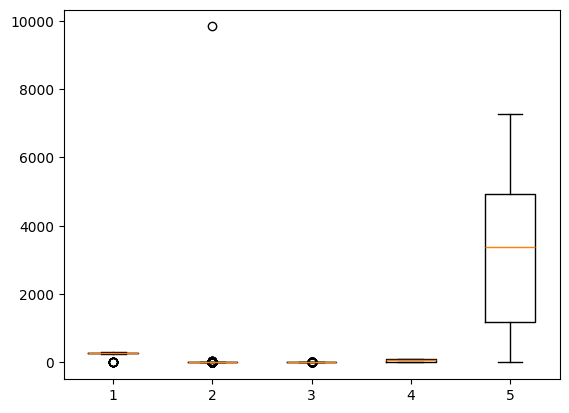

In [124]:
plt.boxplot(num_df)
plt.show()

In [125]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(num_df)

array([[0.92972555, 0.        , 0.        , 0.4       , 0.76167582],
       [0.93320863, 0.        , 0.        , 0.75      , 0.62032967],
       [0.93391815, 0.        , 0.        , 0.9       , 0.65480769],
       ...,
       [0.91182636, 0.        , 0.        , 0.9       , 0.29656593],
       [0.90976231, 0.        , 0.        , 0.9       , 0.19917582],
       [0.90985906, 0.        , 0.        , 0.9       , 0.13104396]])

In [126]:
from sklearn.preprocessing import LabelEncoder
for col in cat_df:
  encoder=LabelEncoder()
  cat_df[col]=encoder.fit_transform(cat_df[col])

In [128]:
final_df = pd.concat([num_df, cat_df],axis=1)

In [129]:
X = final_df.drop('traffic_volume',axis=1)
y = final_df['traffic_volume']

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [133]:
regressor = RandomForestRegressor()

In [134]:
n_estimators = [25,50,75,100]
criterion = ['squared_error','friedman_mse']
max_depth = [3,5,10]



In [135]:
parameters = {'n_estimators':n_estimators,
              'criterion':criterion,
              'max_depth':max_depth}

In [136]:
RFC_cls = GridSearchCV(regressor,parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [137]:
RFC_cls.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'n_estimators': 100}

In [138]:
regressor = RandomForestRegressor(criterion='friedman_mse',max_depth=5,n_estimators=100)
regressor.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5)

In [139]:
ypred_reg = regressor.predict(X_test)

In [140]:
ypred_reg

array([3142.68384382, 2421.39104738, 2947.50514992, ..., 3074.14923291,
       2755.14497955, 3327.87213085])

In [145]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [146]:
mse = mean_squared_error(y_test, ypred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,ypred_reg)
r2 = r2_score(y_test, ypred_reg)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 3650887.4155058265
RMSE: 1910.7295505920838
MAE: 1658.443235583197
R2 Score: 0.0748119750666425
